In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors

In [2]:
df = pd.read_csv('agent_1_data.csv')

In [3]:
c = []
x_train = []
for i in range(len(df)):
    arr = np.fromstring(df['x'][i].replace('[', '').replace(']', ''), dtype=int, sep='\n').reshape(3,3)
    arr = arr/arr.max()
    c.append(np.asarray(arr))
x_train = np.asarray(c)
x_train = np.asarray(x_train)
x_train.shape
#     print(arr.shape)
#     print(arr)

(3314, 3, 3)

In [4]:
# c = []
# x_train = []
# for i in range(len(df)):
#     arr = []
# #     print(df['x'][i].replace('[', '').replace(']', '').split('\n'))
# #     print(len(df['x'][i].replace('[', '').replace(']', '').split('\n')))
    
#     for arr in df['x'][i].split('\n'):
#         arr = arr.replace('[', '').replace(']', '').split()
#         print(arr)
#         arr = [int(m) for m in arr]
#         arr = np.asarray(arr)
#         arr = arr/arr.max()
#         c.append(np.asarray(arr))
    
#     x_train.append(np.asarray(c))
# x_train = np.asarray(x_train)
# x_train.shape

In [5]:
out = []
for i in range(len(df)):
    a = df['y'][i].replace('[', '').replace(']', '').replace(',','').split()
    a = [int(m) for m in a]
    out.append(np.asarray(a))
y_train = out
y_train = np.asarray(out)
y_train

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [6]:
y_train.shape

(3314, 4)

In [7]:
y_test = y_train[0]
x_test = x_train[0]

In [8]:
a = []
for i in (y_train):
    row = list(i).index(1)
    a.append(row)
y_train = np.asarray(a)

    # y_train[0]

In [9]:
y_train.shape

(3314,)

In [10]:
#sequential is the basic model
model = tf.keras.models.Sequential()

# we add hidden layers into our network. 128 is the number of neurons that we use
# relu is a basic activation sigmoid function
# softmax is used for probability distribution (used in final/output layer with 10 neurons)
# we reduce 28x28 array to a flatten layer as it is multidimensional and hard to compute
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(4, activation = tf.nn.softmax))

#parameters for training for the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

print('x_train', x_train.shape)
print('\ny_train', y_train.shape)
model.fit(x_train,y_train, epochs = 20)

x_train (3314, 3, 3)

y_train (3314,)
Epoch 1/20
104/104 [==============================] - 0s 670us/step - loss: 1.0278 - accuracy: 0.5036
Epoch 2/20
104/104 [==============================] - 0s 611us/step - loss: 0.8100 - accuracy: 0.7094
Epoch 3/20
104/104 [==============================] - 0s 614us/step - loss: 0.6473 - accuracy: 0.7643
Epoch 4/20
104/104 [==============================] - 0s 623us/step - loss: 0.5188 - accuracy: 0.8262
Epoch 5/20
104/104 [==============================] - 0s 645us/step - loss: 0.4312 - accuracy: 0.8603
Epoch 6/20
104/104 [==============================] - 0s 645us/step - loss: 0.3632 - accuracy: 0.8865
Epoch 7/20
104/104 [==============================] - 0s 702us/step - loss: 0.2977 - accuracy: 0.9203
Epoch 8/20
104/104 [==============================] - 0s 679us/step - loss: 0.2464 - accuracy: 0.9387
Epoch 9/20
104/104 [==============================] - 0s 657us/step - loss: 0.2054 - accuracy: 0.9587
Epoch 10/20
104/104 [=======================

In [11]:
x_test = np.asarray([x_test])

In [12]:
# calculate the validation loss
val_loss, val_accuracy = model.evaluate(x_train, np.asarray(y_train))
print(val_loss, val_accuracy)

104/104 [==============================] - 0s 486us/step - loss: 0.0618 - accuracy: 0.9837
0.0617997981607914 0.9837055206298828


In [13]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [14]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [15]:
x_test.shape

(1, 3, 3)

In [16]:
x_test

array([[[0.25, 0.75, 0.75],
        [0.25, 0.75, 0.75],
        [1.  , 0.5 , 0.75]]])

In [17]:
predictions = new_model.predict(x_test)

In [18]:
print(predictions[0])
print(predictions[0].max())

[9.8037738e-01 3.3702111e-04 8.2812306e-07 1.9284762e-02]
0.9803774


In [19]:
def get_children(x, y, n, visited_list):
    """
    This function is used to return children of a particular node
    x: row value of current node
    y: column value of current node
    n: size of maze
    gofn: g(n) value of current node
    visited_list: list of nodes that are already visited
    matrix: maze
    agent_matrix: matrix of the agent that holds the information of updated environment
    """
    allChildren = [(x+1,y),#down
                   (x-1,y),#up
                   (x,y+1),#right
                   (x,y-1)]#left
    if x+1 > n-1:
        allChildren.remove((x+1,y))
    if x-1 < 0:
        allChildren.remove((x-1,y))
    if y+1 > n-1:
        allChildren.remove((x,y+1))
    if y-1 < 0:
        allChildren.remove((x,y-1))
    allChildren = [node for node in allChildren if node[:2] not in visited_list]

    return allChildren

In [20]:
# next_move((0,0), np.asarray([[0.1947099 , 0.3240646,  0.27810824, 0.20311731]]))

In [21]:
def populateMatrix(n,p):
    """
    This function returns randomly populated maze
    p: probabillity density of each cell
    n: size of the maze
    """
    global block_unblock_matrix
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    block_unblock_matrix = np.asmatrix(np_array)

    ############testing on hard coded matrix ###########
#     block_unblock_matrix = [[0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0],
#             [0, 0, 0, 0, 0],
#             [0, 1, 0, 0, 0],
#             [1, 0, 0, 1, 0]]
#     ######################################
#     populateMatrix(n,p)
    block_unblock_matrix = np.matrix(block_unblock_matrix)
    plt.spy(block_unblock_matrix)
    return block_unblock_matrix


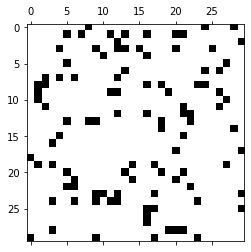

In [24]:
maze_size = 30
agent_grid_world = np.full((maze_size, maze_size),3)
agent_grid_world = np.asmatrix(agent_grid_world)
full_grid_world = populateMatrix(maze_size, 0.1)
plt.spy(full_grid_world)

# _ = outfile.seek(0)
# full_grid_world = np.load(outfile)

In [25]:
def next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag):
    message = ''
#     if flag == 'blocked':
#         if trajectory:
#             return trajectory[-1], message
#         else:
#             return trajectory[-1], "Can't reach goal"

    print('current_node -- (next_move)', current_node)
    indices = zip(np.where(predictions[0] == predictions[0].max()))

#     print(predictions[0])
    for row in indices:
        print(row)
        if row[0][0] == 0:
            message = 'up'
            print(message)
            next_node = (current_node[0] - 1, current_node[1])
        elif row[0][0] == 1:
            message = 'down'
            print(message)
            next_node = (current_node[0] + 1, current_node[1])
        elif row[0][0] == 2:
            message = 'left'
            print(message)
            next_node = (current_node[0], current_node[1] - 1)
        elif row[0][0] == 3:
            message = 'right'
            print(message)
            next_node = (current_node[0], current_node[1] + 1)
            
    return next_node, message
#     try:
#         print(full_grid_world.item(next_node))
# #         print('##########')
# #         print('next_node -- (next_move 2)', next_node)
#         if next_node not in visited_list:
#             return next_node, message
#         else:
#             children = get_children(current_node[0], current_node[1], maze_size, visited_list)
#             for i in children:
#                 if i not in visited_list:
#                     return i, message
#                 else:
#                     returni, "Can't reach goal"
#     except Exception as err:
#         print(err)
#         children = get_children(current_node[0], current_node[1], maze_size, visited_list)
#         for i in children:
#             if i not in visited_list:
#                 return i, message
#             else:
#                 return i , "Can't reach goal"
#         return children[-1], message

In [26]:
def get_neighbors(row, col, n):
    dir = [[-1, -1], [-1, 0],[-1, 1], [0, -1], [0, 0],  [0, 1], [1, -1], [1, 0], [1, 1]]
    friend = []
    count = 0
    for x, y in dir:
        row_new = row + x
        col_new = col + y
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            count += 1
            friend.append((row_new, col_new))
    return count, friend

In [27]:
def get_window(current_node, agent_grid_world, full_grid_world):
    a = []
    b = []
    count, neighbors = get_neighbors(current_node[0],current_node[1], maze_size)

    if len(neighbors) == 4:
        if current_node == (0,0):
            count, neighbors = get_neighbors(1,1, maze_size)
        elif current_node == (0,maze_size-1):
            count, neighbors = get_neighbors(1,maze_size-2, maze_size)
        elif current_node == (maze_size-1,0):
            count, neighbors = get_neighbors(maze_size-2, 1, maze_size)
        elif current_node == (maze_size-1,maze_size-1):
            count, neighbors = get_neighbors(maze_size-2,maze_size-2, maze_size)
    elif len(neighbors) == 6:
        if current_node[0] == 0:
            count, neighbors = get_neighbors(current_node[0] + 1,current_node[1], maze_size)
        elif current_node[0] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0] - 1,current_node[1], maze_size)
        elif current_node[1] == 0:
            count, neighbors = get_neighbors(current_node[0],current_node[1] + 1, maze_size)
        elif current_node[1] == maze_size-1:
            count, neighbors = get_neighbors(current_node[0],current_node[1] - 1, maze_size)
    for i in neighbors:
        a.append(agent_grid_world[i])
        b.append(full_grid_world[i])
    window = np.asarray(a).reshape(3,3)
    print('neighbors', neighbors)
    print("full grid:", np.asarray(b).reshape(3,3))

    return window

neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[4 3 3]
 [3 3 3]
 [3 3 3]]
free
current_node -- (next_move) (0, 0)
(array([1], dtype=int64),)
down
next_node out (1, 0)
message down


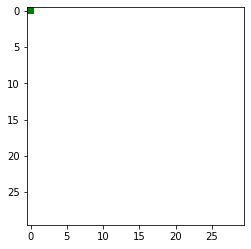

[(0, 0)]
neighbors [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (1, 0)
(array([1], dtype=int64),)
down
next_node out (2, 0)
message down


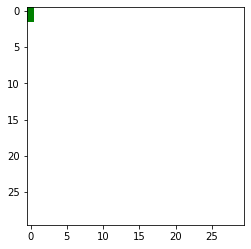

[(0, 0), (1, 0)]
neighbors [(1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (2, 0)
(array([1], dtype=int64),)
down
next_node out (3, 0)
message down


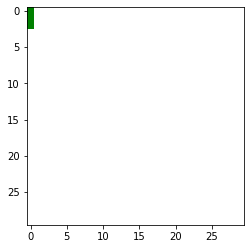

[(0, 0), (1, 0), (2, 0)]
neighbors [(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (3, 0)
(array([1], dtype=int64),)
down
next_node out (4, 0)
message down


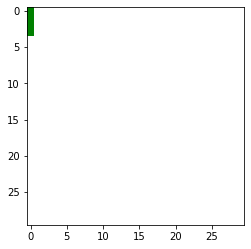

[(0, 0), (1, 0), (2, 0), (3, 0)]
neighbors [(3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (4, 0)
(array([1], dtype=int64),)
down
next_node out (5, 0)
message down


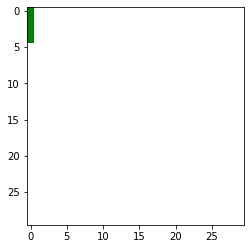

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]
neighbors [(4, 0), (4, 1), (4, 2), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (5, 0)
(array([1], dtype=int64),)
down
next_node out (6, 0)
message down


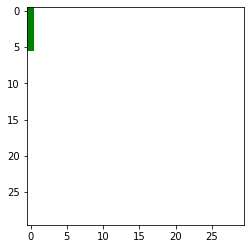

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
neighbors [(5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (6, 0)
(array([1], dtype=int64),)
down
next_node out (7, 0)
message down


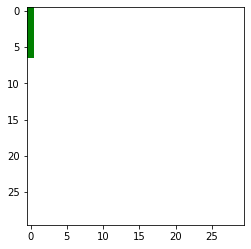

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)]
neighbors [(6, 0), (6, 1), (6, 2), (7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2)]
full grid: [[0 0 0]
 [0 0 1]
 [0 1 1]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (7, 0)
(array([1], dtype=int64),)
down
next_node out (8, 0)
message down


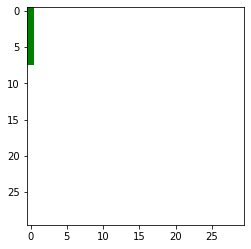

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)]
neighbors [(7, 0), (7, 1), (7, 2), (8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2)]
full grid: [[0 0 1]
 [0 1 1]
 [0 1 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (8, 0)
(array([1], dtype=int64),)
down
next_node out (9, 0)
message down


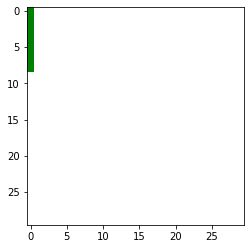

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)]
neighbors [(8, 0), (8, 1), (8, 2), (9, 0), (9, 1), (9, 2), (10, 0), (10, 1), (10, 2)]
full grid: [[0 1 1]
 [0 1 0]
 [0 1 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (9, 0)
(array([1], dtype=int64),)
down
next_node out (10, 0)
message down


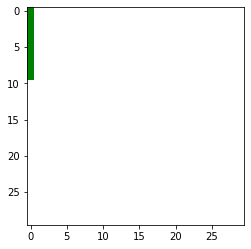

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)]
neighbors [(9, 0), (9, 1), (9, 2), (10, 0), (10, 1), (10, 2), (11, 0), (11, 1), (11, 2)]
full grid: [[0 1 0]
 [0 1 0]
 [0 0 1]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (10, 0)
(array([1], dtype=int64),)
down
next_node out (11, 0)
message down


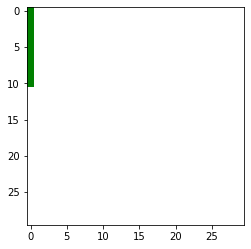

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0)]
neighbors [(10, 0), (10, 1), (10, 2), (11, 0), (11, 1), (11, 2), (12, 0), (12, 1), (12, 2)]
full grid: [[0 1 0]
 [0 0 1]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (11, 0)
(array([1], dtype=int64),)
down
next_node out (12, 0)
message down


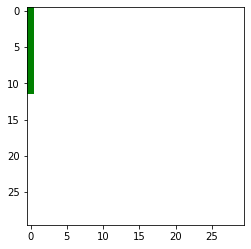

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0)]
neighbors [(11, 0), (11, 1), (11, 2), (12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2)]
full grid: [[0 0 1]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (12, 0)
(array([1], dtype=int64),)
down
next_node out (13, 0)
message down


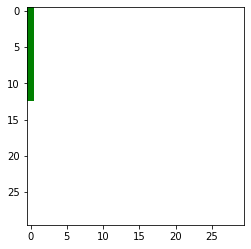

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0)]
neighbors [(12, 0), (12, 1), (12, 2), (13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (13, 0)
(array([1], dtype=int64),)
down
next_node out (14, 0)
message down


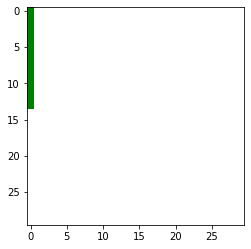

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0)]
neighbors [(13, 0), (13, 1), (13, 2), (14, 0), (14, 1), (14, 2), (15, 0), (15, 1), (15, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (14, 0)
(array([1], dtype=int64),)
down
next_node out (15, 0)
message down


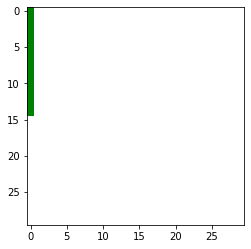

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0)]
neighbors [(14, 0), (14, 1), (14, 2), (15, 0), (15, 1), (15, 2), (16, 0), (16, 1), (16, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (15, 0)
(array([1], dtype=int64),)
down
next_node out (16, 0)
message down


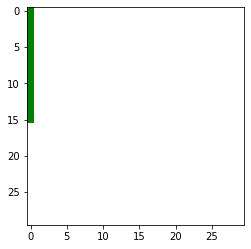

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0)]
neighbors [(15, 0), (15, 1), (15, 2), (16, 0), (16, 1), (16, 2), (17, 0), (17, 1), (17, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (16, 0)
(array([1], dtype=int64),)
down
next_node out (17, 0)
message down


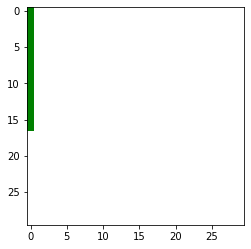

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0)]
neighbors [(16, 0), (16, 1), (16, 2), (17, 0), (17, 1), (17, 2), (18, 0), (18, 1), (18, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
free
current_node -- (next_move) (17, 0)
(array([1], dtype=int64),)
down
next_node out (18, 0)
message down


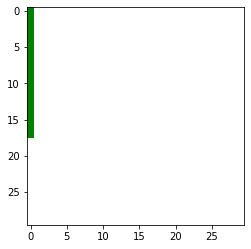

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0)]
neighbors [(17, 0), (17, 1), (17, 2), (18, 0), (18, 1), (18, 2), (19, 0), (19, 1), (19, 2)]
full grid: [[0 0 0]
 [1 0 0]
 [0 1 0]]
[[1 3 3]
 [4 3 3]
 [3 3 3]]
blocked
next node::::  (17, 0)


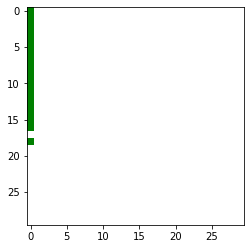

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0)]
neighbors [(16, 0), (16, 1), (16, 2), (17, 0), (17, 1), (17, 2), (18, 0), (18, 1), (18, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 0]]
[[1 3 3]
 [4 3 3]
 [2 3 3]]
free
current_node -- (next_move) (17, 0)
(array([3], dtype=int64),)
right
next_node out (17, 1)
message right


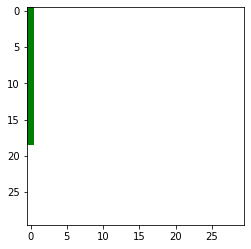

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0)]
neighbors [(16, 0), (16, 1), (16, 2), (17, 0), (17, 1), (17, 2), (18, 0), (18, 1), (18, 2)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 0]]
[[1 3 3]
 [1 4 3]
 [2 3 3]]
free
current_node -- (next_move) (17, 1)
(array([1], dtype=int64),)
down
next_node out (18, 1)
message down


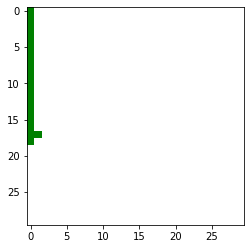

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1)]
neighbors [(17, 0), (17, 1), (17, 2), (18, 0), (18, 1), (18, 2), (19, 0), (19, 1), (19, 2)]
full grid: [[0 0 0]
 [1 0 0]
 [0 1 0]]
[[1 1 3]
 [2 4 3]
 [3 3 3]]
free
current_node -- (next_move) (18, 1)
(array([1], dtype=int64),)
down
next_node out (19, 1)
message down


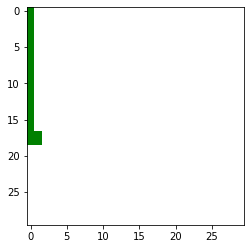

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1)]
neighbors [(18, 0), (18, 1), (18, 2), (19, 0), (19, 1), (19, 2), (20, 0), (20, 1), (20, 2)]
full grid: [[1 0 0]
 [0 1 0]
 [0 0 0]]
[[2 1 3]
 [3 4 3]
 [3 3 3]]
blocked
next node::::  (18, 1)


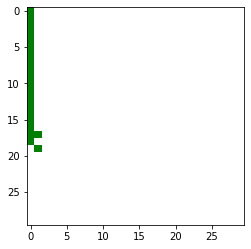

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1)]
neighbors [(17, 0), (17, 1), (17, 2), (18, 0), (18, 1), (18, 2), (19, 0), (19, 1), (19, 2)]
full grid: [[0 0 0]
 [1 0 0]
 [0 1 0]]
[[1 1 3]
 [2 4 3]
 [3 2 3]]
free
current_node -- (next_move) (18, 1)
(array([3], dtype=int64),)
right
next_node out (18, 2)
message right


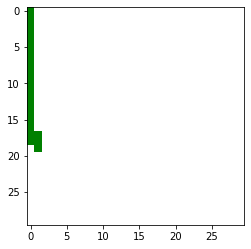

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1)]
neighbors [(17, 1), (17, 2), (17, 3), (18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 1]]
[[1 3 3]
 [1 4 3]
 [2 3 3]]
free
current_node -- (next_move) (18, 2)
(array([1], dtype=int64),)
down
next_node out (19, 2)
message down


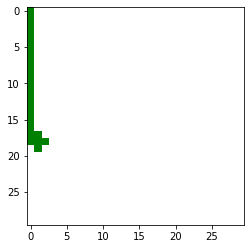

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2)]
neighbors [(18, 1), (18, 2), (18, 3), (19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3)]
full grid: [[0 0 0]
 [1 0 1]
 [0 0 0]]
[[1 1 3]
 [2 4 3]
 [3 3 3]]
free
current_node -- (next_move) (19, 2)
(array([1], dtype=int64),)
down
next_node out (20, 2)
message down


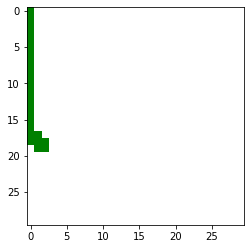

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2)]
neighbors [(19, 1), (19, 2), (19, 3), (20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3)]
full grid: [[1 0 1]
 [0 0 0]
 [0 0 0]]
[[2 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (20, 2)
(array([1], dtype=int64),)
down
next_node out (21, 2)
message down


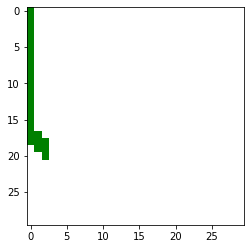

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2)]
neighbors [(20, 1), (20, 2), (20, 3), (21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (21, 2)
(array([1], dtype=int64),)
down
next_node out (22, 2)
message down


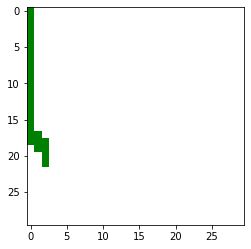

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2)]
neighbors [(21, 1), (21, 2), (21, 3), (22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (22, 2)
(array([1], dtype=int64),)
down
next_node out (23, 2)
message down


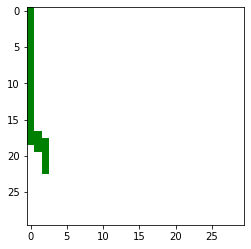

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2)]
neighbors [(22, 1), (22, 2), (22, 3), (23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (23, 2)
(array([1], dtype=int64),)
down
next_node out (24, 2)
message down


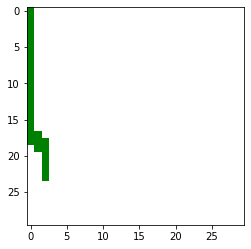

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2)]
neighbors [(23, 1), (23, 2), (23, 3), (24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (24, 2)
(array([1], dtype=int64),)
down
next_node out (25, 2)
message down


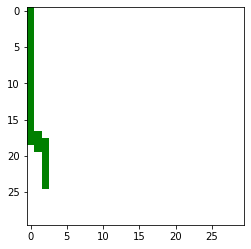

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2)]
neighbors [(24, 1), (24, 2), (24, 3), (25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3)]
full grid: [[0 0 1]
 [0 0 0]
 [0 0 0]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (25, 2)
(array([1], dtype=int64),)
down
next_node out (26, 2)
message down


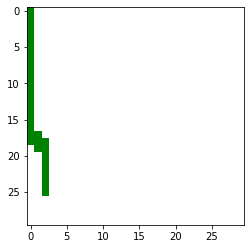

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2)]
neighbors [(25, 1), (25, 2), (25, 3), (26, 1), (26, 2), (26, 3), (27, 1), (27, 2), (27, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (26, 2)
(array([1], dtype=int64),)
down
next_node out (27, 2)
message down


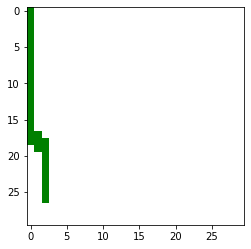

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2)]
neighbors [(26, 1), (26, 2), (26, 3), (27, 1), (27, 2), (27, 3), (28, 1), (28, 2), (28, 3)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (27, 2)
(array([1], dtype=int64),)
down
next_node out (28, 2)
message down


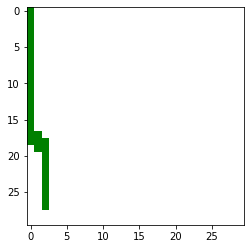

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2)]
neighbors [(27, 1), (27, 2), (27, 3), (28, 1), (28, 2), (28, 3), (29, 1), (29, 2), (29, 3)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
[[3 1 3]
 [3 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 2)
(array([1], dtype=int64),)
down
next_node out (29, 2)
message down


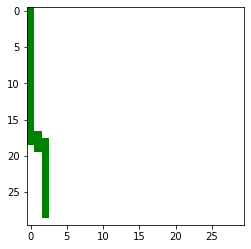

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2)]
neighbors [(27, 1), (27, 2), (27, 3), (28, 1), (28, 2), (28, 3), (29, 1), (29, 2), (29, 3)]
full grid: [[0 0 0]
 [0 0 1]
 [0 0 0]]
[[3 1 3]
 [3 1 3]
 [3 4 3]]
free
current_node -- (next_move) (29, 2)
(array([3], dtype=int64),)
right
next_node out (29, 3)
message right


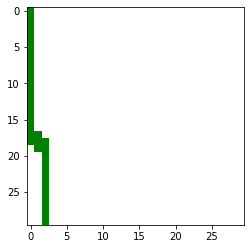

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2)]
neighbors [(27, 2), (27, 3), (27, 4), (28, 2), (28, 3), (28, 4), (29, 2), (29, 3), (29, 4)]
full grid: [[0 0 0]
 [0 1 0]
 [0 0 0]]
[[1 3 3]
 [1 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 3)
(array([3], dtype=int64),)
right
next_node out (29, 4)
message right


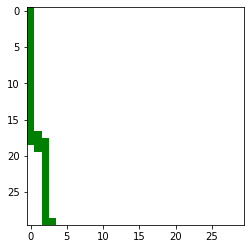

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3)]
neighbors [(27, 3), (27, 4), (27, 5), (28, 3), (28, 4), (28, 5), (29, 3), (29, 4), (29, 5)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 4)
(array([3], dtype=int64),)
right
next_node out (29, 5)
message right


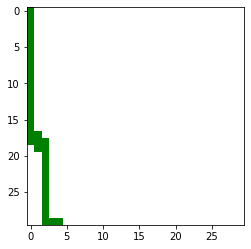

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4)]
neighbors [(27, 4), (27, 5), (27, 6), (28, 4), (28, 5), (28, 6), (29, 4), (29, 5), (29, 6)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 5)
(array([3], dtype=int64),)
right
next_node out (29, 6)
message right


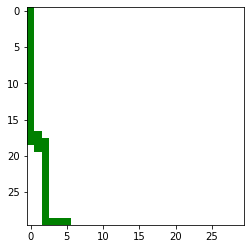

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5)]
neighbors [(27, 5), (27, 6), (27, 7), (28, 5), (28, 6), (28, 7), (29, 5), (29, 6), (29, 7)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 6)
(array([3], dtype=int64),)
right
next_node out (29, 7)
message right


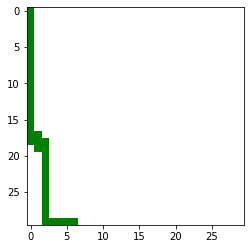

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6)]
neighbors [(27, 6), (27, 7), (27, 8), (28, 6), (28, 7), (28, 8), (29, 6), (29, 7), (29, 8)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 7)
(array([3], dtype=int64),)
right
next_node out (29, 8)
message right


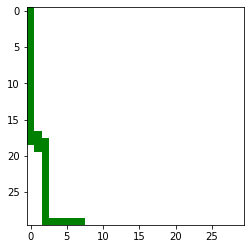

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7)]
neighbors [(27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9), (29, 7), (29, 8), (29, 9)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 8)
(array([3], dtype=int64),)
right
next_node out (29, 9)
message right


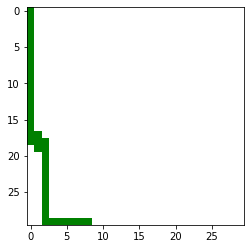

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8)]
neighbors [(27, 8), (27, 9), (27, 10), (28, 8), (28, 9), (28, 10), (29, 8), (29, 9), (29, 10)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
blocked
next node::::  (29, 8)


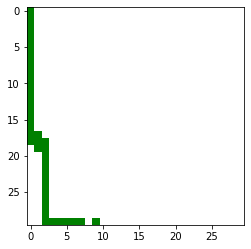

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9)]
neighbors [(27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9), (29, 7), (29, 8), (29, 9)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
[[3 3 3]
 [3 3 3]
 [1 4 2]]
free
current_node -- (next_move) (29, 8)
(array([0], dtype=int64),)
up
next_node out (28, 8)
message up


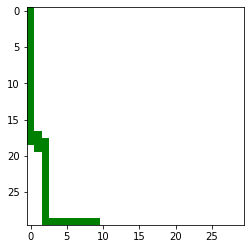

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9)]
neighbors [(27, 7), (27, 8), (27, 9), (28, 7), (28, 8), (28, 9), (29, 7), (29, 8), (29, 9)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 1]]
[[3 3 3]
 [3 4 3]
 [1 1 2]]
free
current_node -- (next_move) (28, 8)
(array([3], dtype=int64),)
right
next_node out (28, 9)
message right


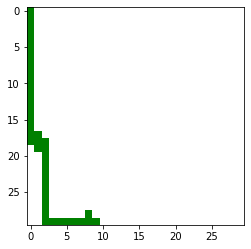

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8)]
neighbors [(27, 8), (27, 9), (27, 10), (28, 8), (28, 9), (28, 10), (29, 8), (29, 9), (29, 10)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
[[3 3 3]
 [1 4 3]
 [1 2 3]]
free
current_node -- (next_move) (28, 9)
(array([3], dtype=int64),)
right
next_node out (28, 10)
message right


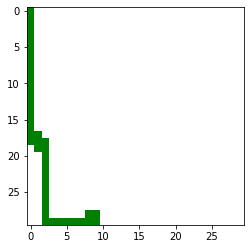

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9)]
neighbors [(27, 9), (27, 10), (27, 11), (28, 9), (28, 10), (28, 11), (29, 9), (29, 10), (29, 11)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 0]]
[[3 3 3]
 [1 4 3]
 [2 3 3]]
free
current_node -- (next_move) (28, 10)
(array([3], dtype=int64),)
right
next_node out (28, 11)
message right


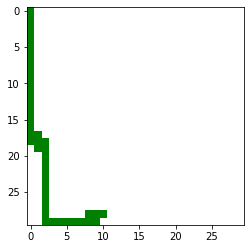

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10)]
neighbors [(27, 10), (27, 11), (27, 12), (28, 10), (28, 11), (28, 12), (29, 10), (29, 11), (29, 12)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 11)
(array([3], dtype=int64),)
right
next_node out (28, 12)
message right


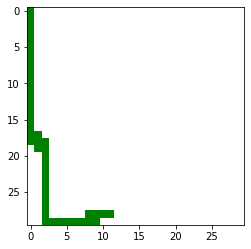

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11)]
neighbors [(27, 11), (27, 12), (27, 13), (28, 11), (28, 12), (28, 13), (29, 11), (29, 12), (29, 13)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 12)
(array([3], dtype=int64),)
right
next_node out (28, 13)
message right


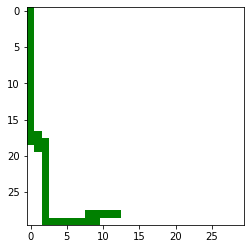

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12)]
neighbors [(27, 12), (27, 13), (27, 14), (28, 12), (28, 13), (28, 14), (29, 12), (29, 13), (29, 14)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 13)
(array([3], dtype=int64),)
right
next_node out (28, 14)
message right


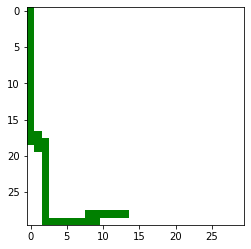

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13)]
neighbors [(27, 13), (27, 14), (27, 15), (28, 13), (28, 14), (28, 15), (29, 13), (29, 14), (29, 15)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 14)
(array([3], dtype=int64),)
right
next_node out (28, 15)
message right


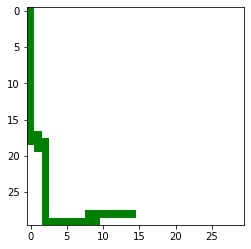

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14)]
neighbors [(27, 14), (27, 15), (27, 16), (28, 14), (28, 15), (28, 16), (29, 14), (29, 15), (29, 16)]
full grid: [[0 0 1]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 15)
(array([3], dtype=int64),)
right
next_node out (28, 16)
message right


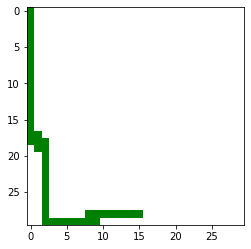

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15)]
neighbors [(27, 15), (27, 16), (27, 17), (28, 15), (28, 16), (28, 17), (29, 15), (29, 16), (29, 17)]
full grid: [[0 1 0]
 [0 0 0]
 [0 0 1]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 16)
(array([3], dtype=int64),)
right
next_node out (28, 17)
message right


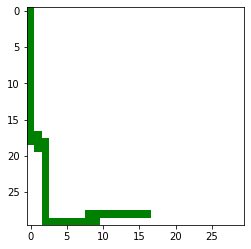

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16)]
neighbors [(27, 16), (27, 17), (27, 18), (28, 16), (28, 17), (28, 18), (29, 16), (29, 17), (29, 18)]
full grid: [[1 0 0]
 [0 0 0]
 [0 1 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 17)
(array([3], dtype=int64),)
right
next_node out (28, 18)
message right


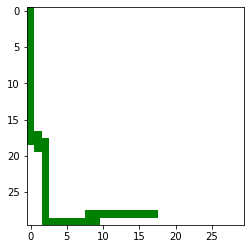

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17)]
neighbors [(27, 17), (27, 18), (27, 19), (28, 17), (28, 18), (28, 19), (29, 17), (29, 18), (29, 19)]
full grid: [[0 0 0]
 [0 0 1]
 [1 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 18)
(array([3], dtype=int64),)
right
next_node out (28, 19)
message right


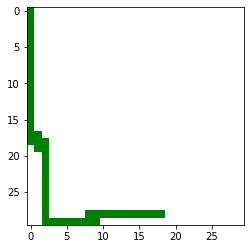

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18)]
neighbors [(27, 18), (27, 19), (27, 20), (28, 18), (28, 19), (28, 20), (29, 18), (29, 19), (29, 20)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
blocked
next node::::  (28, 18)


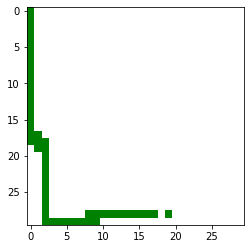

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19)]
neighbors [(27, 17), (27, 18), (27, 19), (28, 17), (28, 18), (28, 19), (29, 17), (29, 18), (29, 19)]
full grid: [[0 0 0]
 [0 0 1]
 [1 0 0]]
[[3 3 3]
 [1 4 2]
 [3 3 3]]
free
current_node -- (next_move) (28, 18)
(array([1], dtype=int64),)
down
next_node out (29, 18)
message down


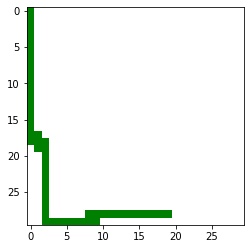

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19)]
neighbors [(27, 17), (27, 18), (27, 19), (28, 17), (28, 18), (28, 19), (29, 17), (29, 18), (29, 19)]
full grid: [[0 0 0]
 [0 0 1]
 [1 0 0]]
[[3 3 3]
 [1 1 2]
 [3 4 3]]
free
current_node -- (next_move) (29, 18)
(array([3], dtype=int64),)
right
next_node out (29, 19)
message right


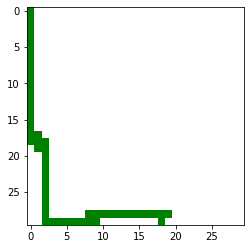

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18)]
neighbors [(27, 18), (27, 19), (27, 20), (28, 18), (28, 19), (28, 20), (29, 18), (29, 19), (29, 20)]
full grid: [[0 0 0]
 [0 1 1]
 [0 0 0]]
[[3 3 3]
 [1 2 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 19)
(array([3], dtype=int64),)
right
next_node out (29, 20)
message right


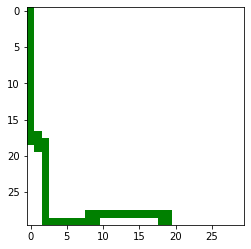

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19)]
neighbors [(27, 19), (27, 20), (27, 21), (28, 19), (28, 20), (28, 21), (29, 19), (29, 20), (29, 21)]
full grid: [[0 0 0]
 [1 1 1]
 [0 0 0]]
[[3 3 3]
 [2 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 20)
(array([3], dtype=int64),)
right
next_node out (29, 21)
message right


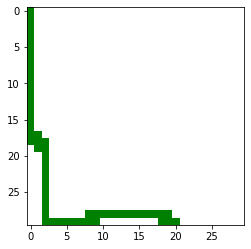

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20)]
neighbors [(27, 20), (27, 21), (27, 22), (28, 20), (28, 21), (28, 22), (29, 20), (29, 21), (29, 22)]
full grid: [[0 0 0]
 [1 1 0]
 [0 0 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 21)
(array([3], dtype=int64),)
right
next_node out (29, 22)
message right


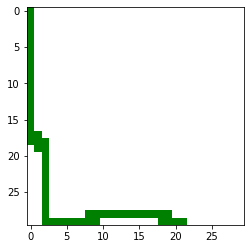

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21)]
neighbors [(27, 21), (27, 22), (27, 23), (28, 21), (28, 22), (28, 23), (29, 21), (29, 22), (29, 23)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
free
current_node -- (next_move) (29, 22)
(array([3], dtype=int64),)
right
next_node out (29, 23)
message right


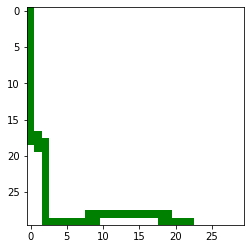

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22)]
neighbors [(27, 22), (27, 23), (27, 24), (28, 22), (28, 23), (28, 24), (29, 22), (29, 23), (29, 24)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
[[3 3 3]
 [3 3 3]
 [1 4 3]]
blocked
next node::::  (29, 22)


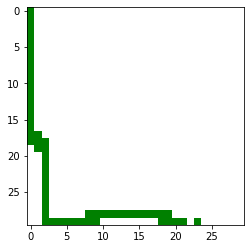

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23)]
neighbors [(27, 21), (27, 22), (27, 23), (28, 21), (28, 22), (28, 23), (29, 21), (29, 22), (29, 23)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
[[3 3 3]
 [3 3 3]
 [1 4 2]]
free
current_node -- (next_move) (29, 22)
(array([0], dtype=int64),)
up
next_node out (28, 22)
message up


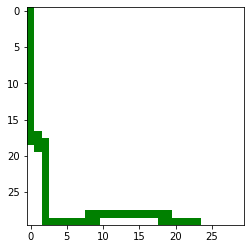

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23)]
neighbors [(27, 21), (27, 22), (27, 23), (28, 21), (28, 22), (28, 23), (29, 21), (29, 22), (29, 23)]
full grid: [[0 0 0]
 [1 0 0]
 [0 0 1]]
[[3 3 3]
 [3 4 3]
 [1 1 2]]
free
current_node -- (next_move) (28, 22)
(array([3], dtype=int64),)
right
next_node out (28, 23)
message right


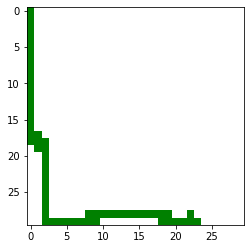

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22)]
neighbors [(27, 22), (27, 23), (27, 24), (28, 22), (28, 23), (28, 24), (29, 22), (29, 23), (29, 24)]
full grid: [[0 0 0]
 [0 0 0]
 [0 1 0]]
[[3 3 3]
 [1 4 3]
 [1 2 3]]
free
current_node -- (next_move) (28, 23)
(array([3], dtype=int64),)
right
next_node out (28, 24)
message right


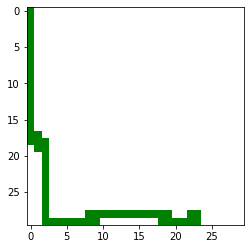

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23)]
neighbors [(27, 23), (27, 24), (27, 25), (28, 23), (28, 24), (28, 25), (29, 23), (29, 24), (29, 25)]
full grid: [[0 0 0]
 [0 0 0]
 [1 0 0]]
[[3 3 3]
 [1 4 3]
 [2 3 3]]
free
current_node -- (next_move) (28, 24)
(array([3], dtype=int64),)
right
next_node out (28, 25)
message right


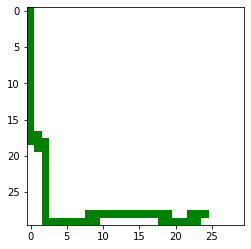

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23), (28, 24)]
neighbors [(27, 24), (27, 25), (27, 26), (28, 24), (28, 25), (28, 26), (29, 24), (29, 25), (29, 26)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 25)
(array([3], dtype=int64),)
right
next_node out (28, 26)
message right


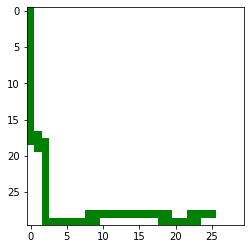

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23), (28, 24), (28, 25)]
neighbors [(27, 25), (27, 26), (27, 27), (28, 25), (28, 26), (28, 27), (29, 25), (29, 26), (29, 27)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 26)
(array([3], dtype=int64),)
right
next_node out (28, 27)
message right


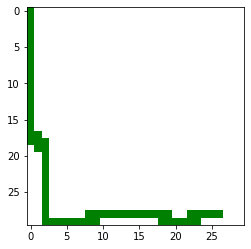

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23), (28, 24), (28, 25), (28, 26)]
neighbors [(27, 26), (27, 27), (27, 28), (28, 26), (28, 27), (28, 28), (29, 26), (29, 27), (29, 28)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 27)
(array([3], dtype=int64),)
right
next_node out (28, 28)
message right


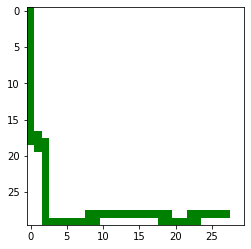

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23), (28, 24), (28, 25), (28, 26), (28, 27)]
neighbors [(27, 27), (27, 28), (27, 29), (28, 27), (28, 28), (28, 29), (29, 27), (29, 28), (29, 29)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 4 3]
 [3 3 3]]
free
current_node -- (next_move) (28, 28)
(array([3], dtype=int64),)
right
next_node out (28, 29)
message right


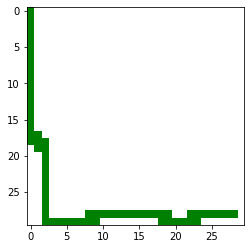

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23), (28, 24), (28, 25), (28, 26), (28, 27), (28, 28)]
neighbors [(27, 27), (27, 28), (27, 29), (28, 27), (28, 28), (28, 29), (29, 27), (29, 28), (29, 29)]
full grid: [[0 0 0]
 [0 0 0]
 [0 0 0]]
[[3 3 3]
 [1 1 4]
 [3 3 3]]
free
current_node -- (next_move) (28, 29)
(array([1], dtype=int64),)
down
next_node out (29, 29)
message down


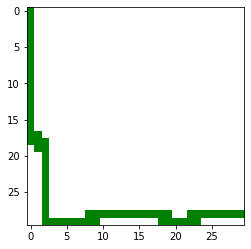

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (17, 1), (18, 1), (19, 1), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (29, 3), (29, 4), (29, 5), (29, 6), (29, 7), (29, 8), (29, 9), (28, 8), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (29, 18), (29, 19), (29, 20), (29, 21), (29, 22), (29, 23), (28, 22), (28, 23), (28, 24), (28, 25), (28, 26), (28, 27), (28, 28), (28, 29)]
Goal reached!!!


In [28]:
goal_reached = False
new_model = tf.keras.models.load_model('epic_num_reader.model')

start = (0,0)
goal = (maze_size-1, maze_size-1)
agent_grid_world.itemset(start, 4)
current_node = start
visited_list = []
trajectory = []

while goal_reached == False:
    trajectory.append(current_node)
    if current_node == goal:
        print('Goal reached!!!')
        goal_reached = True
        break

    if current_node not in visited_list:
        visited_list.append(current_node)

    x_test = get_window(current_node, agent_grid_world, full_grid_world)
    print(x_test)
    x_test = np.asarray(x_test)

    predictions = new_model.predict(np.asarray([x_test]))

    if full_grid_world.item(current_node) == 1:
#         trajectory.pop(-1)
        agent_grid_world.itemset(current_node, 2)
        flag = 'blocked'
        print(flag)
    else:
        agent_grid_world.itemset(current_node, 1)
        flag = 'free'
        print(flag)
    
    if flag == 'free':
        try:

            next_node, message = next_move(current_node, predictions, full_grid_world, visited_list, maze_size, trajectory, flag)
            current_node = next_node
        except Exception as err:
            print(err)
            print('No path to goal')
            break
        print('next_node out',next_node)
        print('message', message)
        if message == "Can't reach goal":
            print('Cannot reach goal')
            break

#     agent_grid_world.itemset(current_node, 1)

    if flag == 'blocked':
        current_node = trajectory[-2]
        print('next node:::: ', current_node)
 
    agent_grid_world.itemset(current_node, 4)

    colormap = colors.ListedColormap(["green","white"])
    plt.imshow(agent_grid_world, cmap=colormap)
    plt.show()
#     print('agent_grid', agent_grid_world)
    print(visited_list)

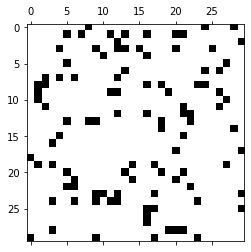

In [29]:
plt.spy(full_grid_world)